In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Load the Oxford-102 Flowers dataset
dataset_name = "oxford_flowers102"
data, info = tfds.load(dataset_name, split=['train', 'test', 'validation'], with_info=True, as_supervised=True)



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

2025-03-17 21:47:40.438222: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742228260.476940    7012 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742228260.489091    7012 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742228260.518425    7012 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742228260.518482    7012 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742228260.518486    7012 computation_placer.cc:177] computation placer alr

In [3]:
# Extract dataset information
num_classes = info.features['label'].num_classes
image_shape = info.features['image'].shape
splits = info.splits


In [4]:
print(f"Dataset: {dataset_name}")
print(f"Number of Classes: {num_classes}")
print(f"Image Shape: {image_shape}")
print(f"Splits: {splits}")


Dataset: oxford_flowers102
Number of Classes: 102
Image Shape: (None, None, 3)
Splits: {Split('train'): <SplitInfo num_examples=1020, num_shards=1>, Split('test'): <SplitInfo num_examples=6149, num_shards=2>, Split('validation'): <SplitInfo num_examples=1020, num_shards=1>}


In [5]:
def analyze_dataset(data_split):
    image_heights = []
    image_widths = []
    
    for image, label in tfds.as_numpy(data_split):
        h, w, _ = image.shape
        image_heights.append(h)
        image_widths.append(w)
    
    print(f"Average Image Height: {np.mean(image_heights):.2f}")
    print(f"Average Image Width: {np.mean(image_widths):.2f}")


In [6]:
analyze_dataset(data[0])

2025-03-17 21:50:53.380402: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


Average Image Height: 537.78
Average Image Width: 624.49


2025-03-17 21:50:54.396465: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
# Display some sample images
def display_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    
    for i, (image, label) in enumerate(tfds.as_numpy(dataset.take(num_images))):
        axes[i].imshow(image)
        axes[i].set_title(f"Class: {label}")
        axes[i].axis("off")
    
    plt.show()


2025-03-17 21:52:06.025038: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


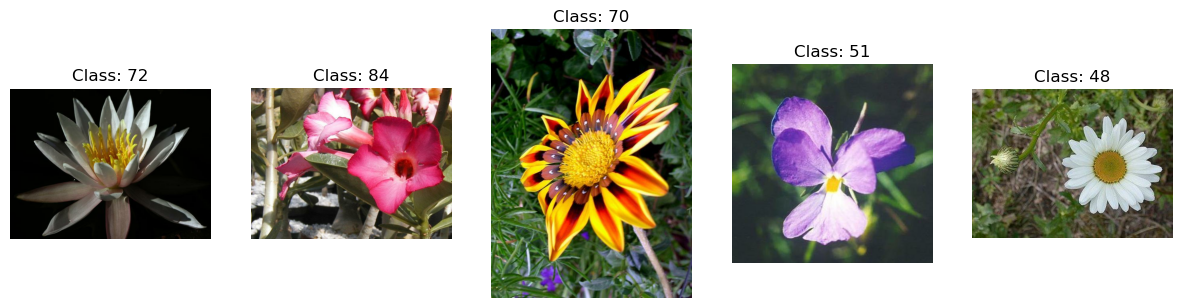

In [8]:
# Show sample images from the training set
display_images(data[0])